# Diversités de la notion de la "donnée typique" et tests d'indépendance

## Introduction

Pour synthétiser la description d'une population, la tentation est grande d'en extraire un individu typique.

Par exemple: il suffit de concevoir les wagons des trains inter-régionaux pour une femme de 40 ans mesurant 1m68, pesant 61 kilos.

Adolphe Quetelet ( https://fr.wikipedia.org/wiki/Adolphe_Quetelet ) a popularisé cette notion discutable mais parfois pertinente d'"homme moyen" autour duquel la population s'éloigne en suivant sagement des distributions gaussiennes.

Plus abstraitement, étant donné un ensemble de donnée, comme des entiers/réels, pouvons nous en proposer un représentant typique.

Nous en connaissons au moins deux comme la moyenne et la médiane.

Nous allons faire un peu de zoologie sur ces estimateurs statistiques et les comparer sur des distributions de boules dans des casiers pour saisir leurs différences, ce qui alors motiver divers choix de modélisation pour les hypothèses statistiques.

Ensuite, nous nous interesserons aux tests de l'éventuel indépendance de deux variables $X$ et $Y$ dont on ne connait que quelques réalisations.

Nous appliquerons ces tests à divers estimateurs (dont ceux du début de séance).

Cette notion d'indépendance sera une des briques de base de la recherche de causalité selon la démarche de Judea Pearl (Prix Turing 2011 pour ces travaux) que nous verrons dans les prochaines séances.

## Plan de la séance


+ E. Variété d'estimateurs
    - La médiane comme solution aux moindres différences absolue
    - La moyenne comme solution aux moindres carrés
    - Estimateurs et espaces $\mathcal{L}^p$, variantes (ex: moyenne tronquées, médian des $k$-moyennes,...).
    - Distributions de balles dans des casiers maximisant les différences entre des estimateurs.
    - Distance de Wasserstein (optionel)

+ F. Corrélation et indépendance de deux variables
    - Corrélation entre deux variables (et cas particulier de l'indépendance)
    - Distribution marginales/table de contingence
    - Test exact de Fisher
    - Test du $\chi^2$.
    - Exemples de tests

## E Variétés d'estimateurs

La moyenne, la médiane sont des estimateurs qui appartiennent à une famille d'estimateurs permettant à partir d'une liste d'observation, d'en définir un représentant "moyen" pour en simplifier la description. 

Ici, nous allons rapprocher ces variantes en les mettant en lien avec des problèmes d'optimisation, une généralisation menant à la distance de Wasserstein des problèmes de transport.

## E.1 Minimisation de l'espérance empirique des différences absolues

Étant donné une liste de $n$ réels $(a_i)_{i=1,\ldots n}$ nous voulons la représenter par un réel $r$ minimisant

$$ C(r) := \sum_{i=1}^{n} \frac{1}{n}|a_i-r|.$$

TODO E.1: Pour une liste de 5 réels $a_1,a_2,\ldots a_5$ généré par __random.random__, dessiner $C(r)$ et les $|a_i-r|$ pour $r$ allant de $-0.25$ à $1.25$. Est ce que le problème de minimisation à une solution raisonnable, voir unique ?
Pour $6$ réels, qu'en est t il ?
Après le dessin complétez la cellule ci-dessous (les #TODO indique une ligne ou une fonction à compléter) et expériementer jusqu'à trouver un exemple convaincant.

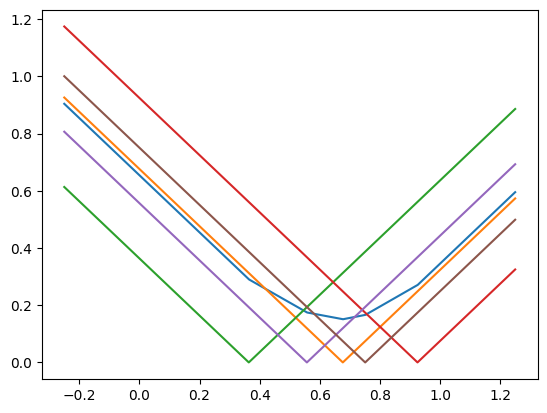

In [2]:
import random

nb_tosses = 5
floats = [random.random() for i in range(nb_tosses)]

import matplotlib.pyplot as plt
from typing import *

def C(r:float, reals:List[float])->float:
    return sum(abs(real - r) for real in reals)/len(reals)

resolution = 10000
min_r = -0.25
max_r = 1.25
rs = [ min_r+(x*(max_r-min_r)/resolution) for x in range(resolution)]
Crs = [ C(r,floats) for r in rs]

plt.plot(rs,Crs)
for ai in floats:
    Cairs = [abs(ai - r) for r in rs]
    plt.plot(rs,Cairs)
plt.show()

TODO E.2: Qu'est est l'estimateur optimisant $C(r)$ ? Prouvez le.

optimisation -> derivée -> median -> minimisation de distance
plusieurs solutions (median +- 1)

### E.2 Minimisation de l'espérance empirique des différences au carré

Nous souhaitons maintenant minimiser $$ D(r) := \sum_{i=1}^n \frac{1}{n}(a_i-r)^2.$$

TODO E.3: Reprenez les questions TODO E.1 et TODO E.2 avec la minimisation de $D(r)$ au lieu de $C(r)$ en dessinant un point sur les minimums (sauf peut-être un tant que vous ne l'avez pas deviner). Travailler avec $3$ réels $a_1,a_2,a_3$ peut suffire à faire une conjecture (avant la preuve).

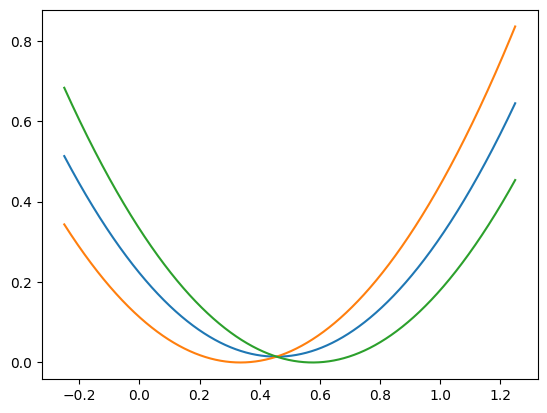

In [3]:
#TODO Start from a copy of cell for E.1
nb_tosses = 2
floats = [random.random() for i in range(nb_tosses)] #TODO


def D(r:float, reals:List[float])->float: #TODO
    return sum(abs(real - r)**2 for real in reals)/len(reals)

resolution = 10000
min_r = -0.25
max_r = 1.25
rs = [ min_r+(x*(max_r-min_r)/resolution) for x in range(resolution)]
Drs = [ D(r,floats) for r in rs]

plt.plot(rs,Drs) #TODO
for ai in floats: #TODO
    Dairs = [abs(ai - r)**2 for r in rs]
    plt.plot(rs,Dairs)
plt.show()


$D(r)$ est (strictement) convexe en tant que somme de fonctions (strictement) convexes.
$D(-\infty) = +\infty$ et $D(+\infty)=+\infty$ donc $D(r)$ admets un unique minimum caractérisé par l'annulation de la dérivée  $\frac{d}{dr}D(r)=0$.
Or $$ \frac{d}{dr}D(r) = \frac{d}{dr}\left(\sum_{i=1}^{n}\frac{1}{n}(a_i-r)^2\right) = \sum_{i=1}^n \frac{-2}{n}(a_i-r) = -2\left( \left(\frac{1}{n}\sum_{i=1}^n a_i \right)-r\right)$$
qui s'annule lorsque $r=\frac{1}{n}\sum_{i=1}^n a_i$ donc la __moyenne__ des $(a_i)_i$.

### E.3 Généralisation regroupant ces problèmes de minimisation.

Soit $p$ un entier strictement positif, nous considérons 
$$ D^{p}(r) := (\sum_{i=1}^n |a_i-r|^p)^{\frac{1}{p}}.$$

TODO E.4: Vérifier que la minimisation de $D^p(r)$ a été traitée pour $p=1$ et $p=2$.

TODO E.5: Programmer pour tout $p$ une recherche (approchée) du minimum de $D^p(r)$ étant donnée l'ensemble de point $(a_i)_i$. Pouvez vous conjecturer d'autres estimateurs pour d'autres valeurs de $p \in \mathbb{R}_+$. Que dire empiriquement des estimateurs pour $p \in ]0,1]$ ?

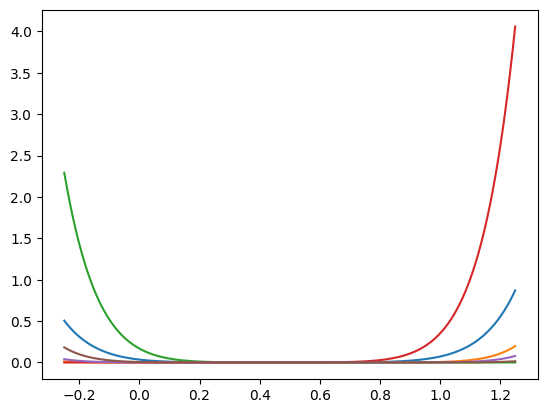

In [4]:
import random

nb_tosses = 5
floats = [random.random() for _ in range(nb_tosses)]

import matplotlib.pyplot as plt
from typing import *

def Dp(r:float, reals:List[float], p:int)->float: #TODO
    return sum(abs(reals[i] - r)**p for i in range(len(reals)))/len(reals)

resolution = 10000
min_r = -0.25
max_r = 1.25
p = 10
rs = [ min_r+(x*(max_r-min_r)/resolution) for x in range(resolution)]
Dprs = [ Dp(r,floats, p) for r in rs]

plt.plot(rs, Dprs) #TODO
for ai in floats: #TODO
    Cairs = [abs(ai - r)**p for r in rs]
    plt.plot(rs, Cairs)
plt.show()

TODO E.6: Faire tendre $p$ vers $+\infty$ (par exemple $p=1000$) et $nb_floats=30$, pouvez vous en déduire un estimateur simple optimisant pour cette limite ?

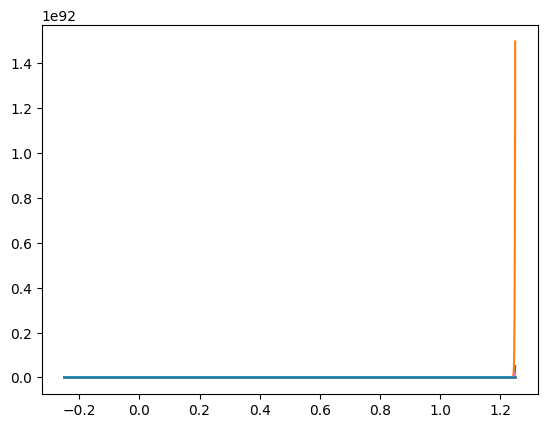

In [5]:
p = 1000
nb_tosses = 30
floats = [ random.random() for _ in range(nb_tosses)] 
min_r = -0.25
max_r = 1.25
floats = [ random.random() for _ in range(nb_tosses)] 
rs = [ min_r+(x*(max_r-min_r)/resolution) for x in range(resolution)]
Dprs = [ Dp(r,floats, p) for r in rs]

plt.plot(rs, Dprs) #TODO
for ai in floats: #TODO
    Cairs = [abs(ai - r)**p for r in rs]
    plt.plot(rs, Cairs)
plt.show()


(#TODO) Nous conjecturons que l'estimateur à la limite $p=+\infty$ est: 
la limite est $sup|a_i-r|$ pour $i \in [1,n], i \in N$

En conclusion, (#TODO)
+ pour $p...$


Nous voyons que le choix de $p$ dans cette famille d'estimateurs paramétrée par $p$ permets de choisir des critères pour l'élément typique.

TODO E.7 Proposer une implémentation générique pour tout $p$ de ces estimateurs en utilisant un découpage entre le minimum et le maximum pour la recherche de minimum. Dessiner les valeur de $n$ réels dans $[0,1]$, et la valeur des $p$-estimateur pour $p \in \{0.25,0.5,0.75,1,1.33,1.66,2,3,4,5,10,100\}$ en utilisant pour ordonnée $\log(p/2)$. (Pourquoi ?)
Question bonus: Existe t il des $(a_i)_i$ pour lesquels les estimateurs sont égaux pour tout $p \in ]0,+\infty[$ ? Question bonus du bonus: Quel est l'ensemble des $(a_i)_i$ pour lesquels tous les estimateurs pour $p\in ]0,+\infty[$ sont égaux.

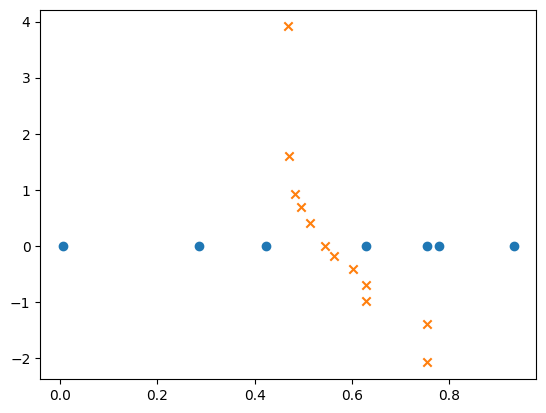

In [6]:
import math

def p_estimator(floats:List[float],p:float,resolution:int):
    min_floats = min(floats)
    max_floats = max(floats)
    rs = [min_floats + i * (max_floats-min_floats)/(resolution - 1) for i in range(resolution)]
    Prs = [sum(abs(ai - r)**p for ai in floats) for r in rs]
    return rs[Prs.index(min(Prs))]
    
def symmetric_floats(batch_size:int)->List[float]:
    found_floats = []
    for _ in range(batch_size//2):
        r = random.random()
        found_floats += [r,1-r]
    if batch_size % 2 == 1:
        found_floats += [0.5]
    return found_floats

batch_size = 7
resolution = 10000
floats = [ random.random() for _ in range(batch_size)]

plt.scatter(floats,[0]*batch_size)
ps = [0.25,0.5,0.75,1,1.33,1.66,2,3,4,5,10,100]

eps = [ p_estimator(floats,p,resolution) for p in ps]
logps = [ math.log(p/2) for p in ps]
plt.scatter(eps,logps,marker='x')
plt.show()

### E.4  Autres estimateurs.

L'ordre des éléments et leur valeur semblent être les deux notions misent en évidence par la famille d'estimateurs paramétrée.

Ici nous considérons deux autres estimateurs s'appuyant sur ces notions.

TODO E.7 Programmez la "moyenne tronquée à $x\%$" qui calcul la moyenne en excluant la proportion $x/2$ des plus petites et plus grande valeurs.

In [7]:
def truncated_average(floats:List[float],x:float)->float:
    cut = int(x*len(floats))
    truncated_list = floats[cut:len(floats)-cut]
    return sum(truncated_list)/len(truncated_list)

L'intérêt de cette moyenne est d'exclure les outliers/intrus extrémaux.

TODO E.8 Programmer le "médian de $k$-moyennes" qui divise en $k$ aléatoirement et le plus équitablement possible les réels en $k$ sous-listes, calcule la moyenne de chaque sous-liste et retourne la médiane de ces $k$ moyennes.

In [8]:
import copy

def median_of_k_means(floats:List[float],k:int)->float:
    n = len(floats)
    average_list = []
    for i in range(0,n,k):
        exit = False
        L=[]
        if(n - (i+k)<= k//2  or i+k > n):
            L = copy.deepcopy(floats[i:])
            exit = True
        else:
            L = copy.deepcopy(floats[i:i+k])
        if(exit):
            continue
        average_list.append(sum(L)/len(L))
    return average_list[len(average_list)//2]

Un intérêt de cet estimateur est de permettre de faire en distribué/paralléle les calculs de moyenne.
Attention, dans une expérimentation pratique il faut bien s'assurer que les sacs/bags sont bien formé par des tirages indépendants dans la population !
(par exemple, lors d'un sondage de passant dans la rue, il est possible d'avoir de fortes correlation entre les groupes de passants sondés).

### E.5 Distributions de balles dans des casiers différenciant les estimateurs.

TODO E.9 Etant donné deux estimateurs, un nombre de boule $n$ et un nombre de casier $m$, trouvez une distribution maximisant la différence entre les deux estimateurs. Systématisez votre démarche pour pouvoir étudier plusieurs paires d'estimateurs et comparer leurs propriété de modélisations.

TODO E.9.1: Compter le nombre de distribution possibles de $n$ boules indistigable dans $m$ casiers. Utiliser __itertools.combinations__ pour générer toutes les distributions possibles via une bijection transformant un sous-ensemble de taille $n$ d'un sous-ensemble de taille $n+(m-1)$ en distribution. (Remarquer que cette bijection permettra d'utiliser un simple iterateur plutôt que la création de toute la liste volumineuse en mémoire et son parcours) Utiliser le code proposé pour évaluer les paires __nb_balls,nb_boxes__ pour lesquelles le temps de parcours est inférieur à la seconde. 

In [23]:
import itertools

# demo combinations

for c in itertools.combinations(range(4),2):
    print(c)

def subset_to_ball_distribution(subset:List[int],nb_balls:int)->Tuple[int]: #TODO
    # subset encode the position of the end of the m-1 first boxes so we add the index of the last m-th box
    N = len(subset) + nb_balls
    C = []
    counter = 0
    for i in range(N):
        if (i in subset):
            counter +=1
        else:
            C.append(counter)
            counter = 0
    return tuple(C)


nb_boxes = 4
nb_balls = 2
for c in itertools.combinations(range(nb_balls+(nb_boxes-1)),(nb_boxes-1)):
    print(c,subset_to_ball_distribution(c,nb_balls))
    
    
import time

max_nb_balls = 15
max_nb_boxes = 50

result = {}
for nb_balls in range(1,max_nb_balls+1):
    print(nb_balls)
    for nb_boxes in range(1,max_nb_boxes+1):
        start_time = time.perf_counter()
        counter = 0
        for c in itertools.combinations(range(nb_balls+(nb_boxes-1)),(nb_boxes-1)):
            d = subset_to_ball_distribution(c,nb_balls)
            counter += 1
        end_time = time.perf_counter()
        duration = end_time - start_time
        #print(f'duration {duration}')
        if duration > 1:
            print(f'nb_balls {nb_balls} nb_boxes {nb_boxes} duration {duration}')
            result[nb_balls] = nb_boxes
            break
print(result)

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)
(0, 1, 2) (3, 0)
(0, 1, 3) (2, 1)
(0, 1, 4) (2, 0)
(0, 2, 3) (1, 2)
(0, 2, 4) (1, 1)
(0, 3, 4) (1, 0)
(1, 2, 3) (0, 3)
(1, 2, 4) (0, 2)
(1, 3, 4) (0, 1)
(2, 3, 4) (0, 0)
1
2
3
4
nb_balls 4 nb_boxes 35 duration 1.1144095000054222
5
nb_balls 5 nb_boxes 25 duration 1.1534739999988233
6
nb_balls 6 nb_boxes 20 duration 1.360823099996196
7
nb_balls 7 nb_boxes 17 duration 1.5509822999956668
8
nb_balls 8 nb_boxes 14 duration 1.0686806000012439
9
nb_balls 9 nb_boxes 13 duration 1.7074498000001768
10
nb_balls 10 nb_boxes 12 duration 1.8668997999993735
11
nb_balls 11 nb_boxes 11 duration 2.2019693000038387
12
nb_balls 12 nb_boxes 10 duration 1.5013222000052338
13
nb_balls 13 nb_boxes 10 duration 2.6321290000050794
14
nb_balls 14 nb_boxes 9 duration 1.5564665000056266
15
nb_balls 15 nb_boxes 9 duration 2.5104341999976896
{4: 35, 5: 25, 6: 20, 7: 17, 8: 14, 9: 13, 10: 12, 11: 11, 12: 10, 13: 10, 14: 9, 15: 9}


Voici pour chaque nombre de balles, le nombre de casiers permettant de dépasser la seconde:

4: 43, ... (#TODO)

TODO E.9.2: Convertir les distributions discrètes en ensemble de nombres flottants dans l'interval unité comme __random.random()__ en évitant $0$ et $1$. Tester votre conversion sur __nb_balls=2__ et __nb_boxes=5__.

In [26]:
def convert_distribution_to_floats_in_unit_interval(distribution:Tuple[int])->List[float]:
    floats = []
    for x in range(len(distribution)):
        floats +=  distribution[x]*[(x+1)/(len(distribution)+1)]
    return floats

nb_balls = 2
nb_boxes = 5

for c in  itertools.combinations(range(nb_balls+(nb_boxes-1)),(nb_boxes-1)):
    d = subset_to_ball_distribution(c,nb_balls)
    f = convert_distribution_to_floats_in_unit_interval(d)
    print(d,f)

(4, 0) [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
(3, 1) [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666]
(3, 0) [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
(2, 2) [0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666]
(2, 1) [0.3333333333333333, 0.3333333333333333, 0.6666666666666666]
(2, 0) [0.3333333333333333, 0.3333333333333333]
(1, 3) [0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
(1, 2) [0.3333333333333333, 0.6666666666666666, 0.6666666666666666]
(1, 1) [0.3333333333333333, 0.6666666666666666]
(1, 0) [0.3333333333333333]
(0, 4) [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
(0, 3) [0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
(0, 2) [0.6666666666666666, 0.6666666666666666]
(0, 1) [0.6666666666666666]
(0, 0) []


TODO E.9.3: Pour une paire d'estimateurs, par exemple la moyenne et la médiane, construire un nuage de points associant dans un dictionnaire à chaque distribution $d$ le point  $(moyenne(d),median(d))$. Jouer sur les paramètres $p_x$ et $p_y$ des estimateurs paramétré par $p$. Qu'observez vous ?

p_x 2.8401162785729483 p_y 3.319670255222868


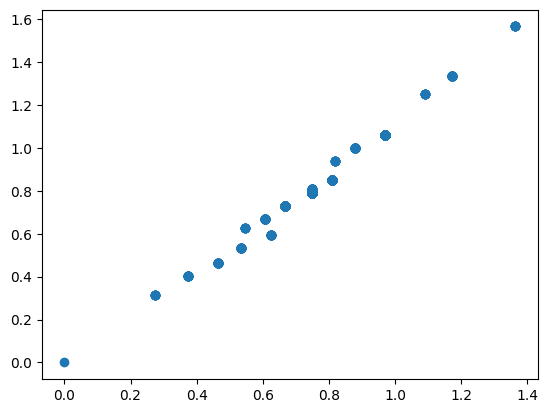

In [29]:
def cloud_of_point_for_two_estimators(x_estimator,y_estimator,nb_balls,nb_boxes): #TODO
    distribution = {}
    for c in itertools.combinations(range(nb_balls+(nb_boxes-1)),(nb_boxes-1)):
        d = subset_to_ball_distribution(c,nb_balls)
        distribution[d] = (x_estimator(d), y_estimator(d))
    return distribution
nb_balls = 7
nb_boxes = 6
resolution = 100
p_x = 1+3*random.random()
p_y = 1+3*random.random()
print(f'p_x {p_x} p_y {p_y}')
x_estimator = lambda fs:p_estimator(fs,p_x,resolution)
y_estimator = lambda fs:p_estimator(fs,p_y,resolution)
points_of_distribution = cloud_of_point_for_two_estimators(x_estimator,y_estimator,nb_balls,nb_boxes)
points = list(points_of_distribution.values())
xs = [p[0] for p in points]
ys = [p[1] for p in points]
plt.scatter(xs,ys)
plt.show()

TODO E.9.4: Détecter l'envelloppe convexe de ces points. Formuler une conjecture lorsque $|p_x-p-y|$ est un entier et que $p_x \geq 1$ et $p_y \geq 1$.

[(1.3636363636363635, 1.5656565656565657), (0.0, 0.0), (0.6262626262626263, 0.5959595959595959)]


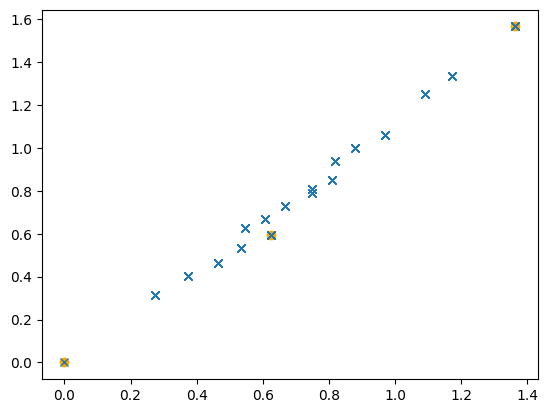

In [30]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
hull = ConvexHull(points)
print(hull)
plt.plot(xs, ys, 'x')
hull_points = [ points[i] for i in hull.vertices]
print(hull_points)
plt.scatter([p[0] for p in hull_points],[p[1] for p in hull_points],c='orange')
plt.show()

(TODO) Empiriquement nous conjecturons que lorsque $|p_x-p_y|$ est un entier non nul alors l'envelloppe convexe est formée de $4$ points formant un parallélogramme. 

TODO E.9.5: Dans les cas où l'envelloppe convexe semble être un parallélogramme, proposer un changement de variable pour l'envoyer sur le carré unité $[0,1]\times[0,1]$. Appliquez ce changement de variable avant de redessiner le nuage de points indexé par les distributions discèretes.

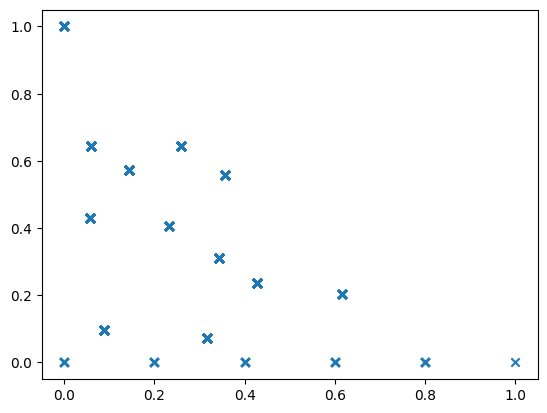

In [31]:
def deduce_change_of_variable_from_convex_hull(hull):
    a = hull[0]
    b = hull[1]
    c = hull[-1]
    (ux,uy) = (b[0]-a[0],b[1]-a[1])
    (vx,vy) = (c[0]-a[0],c[1]-a[1])
    return lambda p: (((p[0]-a[0])*vy-(p[1]-a[1])*vx)/(ux*vy-vx*uy),\
                      ((p[0]-a[0])*uy-(p[1]-a[1])*ux)/(uy*vx-ux*vy))

change_of_variable = deduce_change_of_variable_from_convex_hull(hull_points)

new_points = [ change_of_variable(p) for p in points]
new_xs = [p[0] for p in new_points]
new_ys = [p[1] for p in new_points]
plt.scatter(new_xs,new_ys,marker='x')
plt.show()

Tout cela pour arriver à la question qui nous préoccupera dans la prochaine partie: est ce que modulo ce changement de variables, les deux estimateurs sur une distribution discrète aléatoire selon la mesure uniforme sont indépendants ? (C'est aussi là pour montrer ce que peut apporter la visualisation de données.)

TODO E.9.6: Étant donné deux estimateurs, afficher et interpréter les distributions associées aux points sur l'envellope convexe.

In [32]:
extremal_distributions = [ d for d in points_of_distribution if points_of_distribution[d] in hull_points]
for d in extremal_distributions:
    print(d,points_of_distribution[d],points_of_distribution[d][0]-points_of_distribution[d][1])

(5, 0, 0, 0, 0, 0, 0) (1.3636363636363635, 1.5656565656565657) -0.2020202020202022
(1, 1, 1, 1, 1, 0, 0) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 1, 1, 1, 0, 1, 0) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 1, 1, 1, 0, 0, 1) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 1, 1, 0, 1, 1, 0) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 1, 1, 0, 1, 0, 1) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 1, 1, 0, 0, 1, 1) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 1, 0, 1, 1, 1, 0) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 1, 0, 1, 1, 0, 1) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 1, 0, 1, 0, 1, 1) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 1, 0, 0, 1, 1, 1) (0.6262626262626263, 0.5959595959595959) 0.030303030303030387
(1, 0, 1, 1, 1, 1, 0) (0.6262626262626263, 0.5959595959595959) 0.030303030303

TODO E.9.7: Afficher les distributions pour lesquelles la difference est maximale, puis minimale.

In [33]:
diffs = [ (points_of_distribution[d][0]-points_of_distribution[d][1],d) for d in points_of_distribution]
nb_examples = 10
diffs.sort()
print('e1 >> e0')
for pair in diffs[:nb_examples]:
    print(pair)
print('e0 >> e1')
for pair in diffs[-nb_examples:]:
    print(pair)

e1 >> e0
(-0.2020202020202022, (0, 0, 0, 0, 0, 0, 5))
(-0.2020202020202022, (0, 0, 0, 0, 0, 5, 0))
(-0.2020202020202022, (0, 0, 0, 0, 5, 0, 0))
(-0.2020202020202022, (0, 0, 0, 5, 0, 0, 0))
(-0.2020202020202022, (0, 0, 5, 0, 0, 0, 0))
(-0.2020202020202022, (0, 5, 0, 0, 0, 0, 0))
(-0.2020202020202022, (5, 0, 0, 0, 0, 0, 0))
(-0.16161616161616177, (0, 0, 0, 0, 0, 0, 4))
(-0.16161616161616177, (0, 0, 0, 0, 0, 4, 0))
(-0.16161616161616177, (0, 0, 0, 0, 4, 0, 0))
e0 >> e1
(0.030303030303030387, (1, 1, 0, 0, 1, 1, 1))
(0.030303030303030387, (1, 1, 0, 1, 0, 1, 1))
(0.030303030303030387, (1, 1, 0, 1, 1, 0, 1))
(0.030303030303030387, (1, 1, 0, 1, 1, 1, 0))
(0.030303030303030387, (1, 1, 1, 0, 0, 1, 1))
(0.030303030303030387, (1, 1, 1, 0, 1, 0, 1))
(0.030303030303030387, (1, 1, 1, 0, 1, 1, 0))
(0.030303030303030387, (1, 1, 1, 1, 0, 0, 1))
(0.030303030303030387, (1, 1, 1, 1, 0, 1, 0))
(0.030303030303030387, (1, 1, 1, 1, 1, 0, 0))


### E.6 Généralisation: distance de Wasserstein entre deux distributions.

TODO E.10: Synthétisez ici la présentation au tableau de la distance de Wasserstein dans le cas de $n$ boules distribuées dans $m$ casiers.

TODO E.11: Calculer la distance de Wassertein entre deux distributions de boules dans des casiers le coût de transport étant linéaire en le nombre de changement pour un casier voisin.

TODO E.12(Très optionnel) Pour un estimateur donné, trouver des distributions de $n$ boules dans $m$ casiers (approximativement) de même valeur pour l'estimateur mais de distance de Wasserstein maximale. Systématiser et discuter.

## F. Corrélation et indépendance de deux variables

### F.1 Lois jointes, marginales et possible indépendance

Considérons deux variables aléatoires $X$ et $Y$ sur le même espace de probabilité $\Omega$ à valeur respectives dans __range(I)__:=$\{0,1,\ldots I-1\}$ et __range(J)__:=$\{0,1,\ldots J-1\}$.
La __loi jointe__ $(X,Y)$ de ces variables est la distribution de probabilité des paires $(X(\omega),Y(\omega))$ où $\omega \in \Omega$.
La loi de $(X(\omega))_{\omega \in \Omega}$ seule, donc ignorant la valeur de $Y(\omega)$ est une des __loi marginale__ de la loi jointe $(X,Y)$  (l'autre étant $(Y(\omega))_{\omega\in \Omega}$).

Exemple: Considérons le résultat d'un dé équilibré à 6 faces comme notre espace de probabilité:
__Proba($\omega=i$)__$=\frac{1}{6}$ pour $i=1,\ldots 6$.

- Soit $X \in \{0,1\}$ la valeur modulo $2$ du résultat du dé (la parité).

- Soit $Y \in \{0,1,2\}$ la valeur modulo $3$.

La loi jointe $(X,Y)$ est alors décrite par la matrice suivante (ou la numérotation des colonnes est le résultat de $Y$, celle des colonnes est $X$):
...

Notion d'indépendance de deux variables.

- Soit $Z \in \{0,1,2,3\}$ la valeur modulo $4$ du résultat du dé.

TODO F.1: Notez la définition de loi jointe, lois marginales, rappel de la notion d'indépendance (pour les lois marginales. Montrer que les lois des variables aléatoires $Z$ et $Y$ ne sont pas indépendantes.

### F.2 Tables de contingences et test de Fisher en dimension $2 \times 2$.

Nous voyons que l'hypothèse d'indépendance permets de reconstruire la loi jointe.
Si nous collectons des résultats de nos expériences nous pouvons les stocker dans __une table de contingence__ (introduite en 1904, par Karl Pearson, le père d'Egon).
Etant les données collectées sur la réalisation de deux variables $X$ et $Y$ notre hypothèse nulle sera l'indépendance des deux variables.

Pour tester cette hypothèse, nous allons d'abord utiliser le test exact de Fisher pour le test approché du $\chi^2$ (prononcé "ki 2"). 

TODO F.2: Notez l'exemple de table de contingence au tableau. 

TODO F.3: Notez l'exemple de Test de Fisher exact sur une table $2 \times 2$.

### F.3 Etude combinatoire pour les tests de Fisher en dimension $n \times m$

Le cas des matrices $2 \times 2$ est le plus petit, nous souhaitons étudiez sa généralisation au cas $n \times m$.

Une hypothèse forte sur les tables de contingence est que les lois marginales sont déterminée par la table.
Donc les autres tables possibles doivent avoir les même sommes sur les lignes et les colonnes.
Nous allons étudier la possibilité de naviguer dans les tables de contingence possibles sous $H_0$ à l'aide de l'addition de sous-tables $2 \times 2$ sur les données (et non les sommes partielles) de la forme soit:
$$R_{i,j}^+:= \left(\begin{array}{cc} 
1 & -1 \\
-1 & 1 \\
\end{array}\right) \mbox{ et } 
R_{i,j}^-:= \left(\begin{array}{cc} 
-1 & 1 \\
1 & -1 \\
\end{array}\right)
$$
et appliqué sur les cases $(i,j),(i+1,j),(i,j+1),(i+1,j+1)$ de la partie donnée de la table de contingence.

TODO F.3: Combien de matrice $R^+_{i,j}$ existe t il ? Cela coincide ici avec le degré de liberté $k$ du futur test d'indépendance du $\chi^2$. Notez la formule générale de Fisher pour évaluer sous $H_0$ la probabilité d'une table de contingence. 

Supposons disposer d'une table de contingence, par exemple les données que nous avons collectée. Nous souhaitons explorer toute les tables vérifiant les même sommes partielles en déclarant deux tables voisines si elle ne diffère que par une addition de sous-table $R^+_{i,j}$ ou $R^-_{i,j}$. Nous allons alors calculer un graphe explorant toutes les tables connexes par ces opérations.   

Une table de contingence est un tuple de tuple pour être "hashable".

In [34]:
import networkx # graph library

def convert_dict_to_table(d):
    n = max([ p[0] for p in d])+1
    m = max([ p[1] for p in d])+1
    return tuple([ tuple([ d[(x,y)] for y in range(m)]) for x in range(n)])


def convert_table_to_dict(table):
    n = len(table)
    m = len(table[0])
    return { (x,y): table[x][y] for x in range(n) for y in range(m)}
    
def generate_random_table(n:int, m:int, total:int)->Tuple[Tuple[int]]:
    d = { (x,y) : 0 for x in range(n) for y in range(m)}
    for _ in range(total):
        x = random.randint(0,n-1)
        y = random.randint(0,m-1)
        d[(x,y)] += 1
    return convert_dict_to_table(d)


In [35]:
generate_random_table(2,3,10)

((1, 4, 3), (0, 1, 1))

In [36]:
def apply_R_on_table(i:int,j:int,sign:int,table:Tuple[Tuple[int]])->(bool,Tuple[Tuple[int]]):
    n = len(table)
    m = len(table[0])
    assert(0 <= i < n-1 and 0 <= j < m-1)
    d = convert_table_to_dict(table)
    # TO BE CONTINUED


def graph_of_table(table:Tuple[Tuple[int]])->networkx.Graph:
    n = len(table)
    m = len(table[0])
    unexplored_vertices = [table]
    graph = networkx.Graph()
    graph.add_node(table)
    while unexplored_vertices != []:
        treated_vertex = unexplored_vertices.pop()
        for i in range(n-1):
            for j in range(m-1):
                for sign in [-1,1]:
                    (allowed_addition,a_neighbour) = apply_R_on_table(i,j,sign,treated_vertex)
                    if allowed_addition:
                        if a_neighbour not in graph.nodes():
                            unexplored_vertices += [a_neighbour]
                        graph.add_edge(treated_vertex,a_neighbour)
    return graph

In [37]:
random_table = generate_random_table(2,3,15)
graph = graph_of_table(random_table)
layout = networkx.spring_layout(graph)
networkx.draw(graph,pos=layout)
plt.show()

TypeError: cannot unpack non-iterable NoneType object

### F.4 Expérimentation du test exact de Fisher vers le test approximative du $\chi^2$.